## Các phương pháp thay đổi ảnh đơn giản

Chúng ta sẽ sử dụng các hàm đơn giản trong matplotlib và numpy để thay đổi màu, xê dịch, xoay chiều, crop, thêm filter vào ảnh. Các em có thể chọn hình ảnh bất kì, nếu không hãy dùng cover photo hiện tại của MaSSP trên Facebook page đã được tải về sẵn trong "../../images/massp_cover.png".

Tham khảo các cách data augmentation:

http://lamda.nju.edu.cn/weixs/project/CNNTricks/CNNTricks.html

http://benanne.github.io/2014/04/05/galaxy-zoo.html

Các phương pháp trong lab này:
1. Lấy ma trận 3 chiều thể hiện RBG từ ảnh bất kì
2. Rotation
    * Xoay ảnh theo chiều kim đồng hồ một góc 90, 180, 270 độ
3. Zoom/Crop
    * Crop một phần hình ảnh theo tọa độ góc trên bên trái và kích cỡ ảnh mới
4. Translation
    * Cho delta x và delta y là số pixel thay đổi theo chiều ngang và chiều dọc, trả lại ảnh bị dịch chuyển có cùng kích cỡ (pixel nào thừa ra thì mang giá trị 0)
5. Flip
    * Flip ảnh theo chiều dọc hoặc chiều ngang
6. color perturbation
    * Cách này thêm noise vào hình ảnh để có hiệu ứng như hình này: http://stackoverflow.com/questions/35152636/random-flipping-and-rgb-jittering-slight-value-change-of-image. Ví dụ cho 0.1 thì mỗi phần tử trong ma trận tăng giảm một số ngẫu nhiên từ -0.1 đế +0.1

Đầu tiên hãy import những module cần thiết từ thư viện matplotlib. Documentation: http://matplotlib.org/contents.html. Các phần code sau đây dựa trên matplotlib phiên bản 2.0.0.

In [3]:
import matplotlib.image as mp_image
import matplotlib.pyplot as plt
import numpy as np
from scipy import *

In [6]:
import numpy as np

Và load logo của MaSSP vào một array.

In [8]:
massp_img = "../../images/massp_cover.png"
input_image = mp_image.imread(massp_img)

What are the dimension and shape of this image? Describe the image based on the answers.

<b>answer:</b>

Next, we use matplotlib to plot the image.

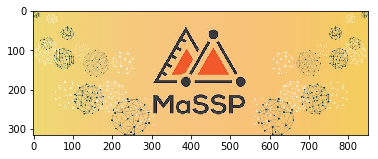

In [394]:
plt.imshow(input_image)
plt.show()

In [395]:
print(input_image.shape)


(315L, 851L, 4L)


In [396]:
input_image

array([[[ 0.93725491,  0.83529413,  0.47058824,  1.        ],
        [ 0.95294118,  0.8509804 ,  0.50980395,  1.        ],
        [ 0.94509804,  0.8392157 ,  0.56078434,  1.        ],
        ..., 
        [ 0.92156863,  0.81568629,  0.41176471,  1.        ],
        [ 0.91764706,  0.80000001,  0.35294119,  1.        ],
        [ 0.92941177,  0.81176472,  0.36470589,  1.        ]],

       [[ 0.90196079,  0.80784315,  0.43137255,  1.        ],
        [ 0.97254902,  0.87843138,  0.53333336,  1.        ],
        [ 0.9137255 ,  0.81960785,  0.52941179,  1.        ],
        ..., 
        [ 0.94901961,  0.83529413,  0.43529412,  1.        ],
        [ 0.94117647,  0.81960785,  0.36470589,  1.        ],
        [ 0.94117647,  0.81176472,  0.36078432,  1.        ]],

       [[ 1.        ,  0.93725491,  0.5411765 ,  1.        ],
        [ 0.86274511,  0.78039217,  0.41568628,  1.        ],
        [ 0.94509804,  0.87058824,  0.56862748,  1.        ],
        ..., 
        [ 0.94117647,  0

How to remove the last column that contains all ones?

[[[ 0.93725491  0.83529413  0.47058824]
  [ 0.95294118  0.8509804   0.50980395]
  [ 0.94509804  0.8392157   0.56078434]
  ..., 
  [ 0.92156863  0.81568629  0.41176471]
  [ 0.91764706  0.80000001  0.35294119]
  [ 0.92941177  0.81176472  0.36470589]]

 [[ 0.90196079  0.80784315  0.43137255]
  [ 0.97254902  0.87843138  0.53333336]
  [ 0.9137255   0.81960785  0.52941179]
  ..., 
  [ 0.94901961  0.83529413  0.43529412]
  [ 0.94117647  0.81960785  0.36470589]
  [ 0.94117647  0.81176472  0.36078432]]

 [[ 1.          0.93725491  0.5411765 ]
  [ 0.86274511  0.78039217  0.41568628]
  [ 0.94509804  0.87058824  0.56862748]
  ..., 
  [ 0.94117647  0.80784315  0.41568628]
  [ 0.96078432  0.81568629  0.35686275]
  [ 0.95686275  0.80392158  0.34509805]]

 ..., 
 [[ 0.93725491  0.8509804   0.4509804 ]
  [ 0.93725491  0.8509804   0.4509804 ]
  [ 0.93725491  0.8509804   0.4509804 ]
  ..., 
  [ 0.95294118  0.80784315  0.36078432]
  [ 0.95294118  0.80784315  0.36078432]
  [ 0.95294118  0.80784315  0.36078

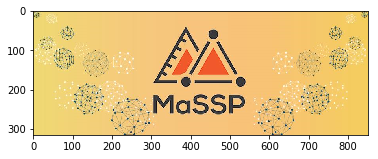

(315, 851, 3)


In [9]:
# Remove 4th channel
input_image = np.delete(input_image, [3], 2)
# OR input_image = input_image[:, :, :3]
print(input_image)
plt.imshow(input_image)
plt.show()
print(input_image.shape)


How to crop out MaSSP logo only?

(315L, 851L, 3L)


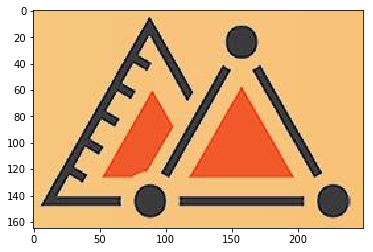

In [398]:
# code
print(input_image.shape)
logo = input_image[35:200, 300:550]
plt.imshow(logo)
plt.show()

If the 3-d array of the logo is "transposed", how does the resulting image look like? Verify by plotting the transposed image.

[[[ 0.96470588  0.78431374  0.49019608]
  [ 0.96470588  0.78431374  0.49019608]
  [ 0.96470588  0.78431374  0.49019608]
  ..., 
  [ 0.96470588  0.78431374  0.49019608]
  [ 0.96470588  0.78431374  0.49019608]
  [ 0.96470588  0.78431374  0.49019608]]

 [[ 0.96470588  0.78431374  0.49019608]
  [ 0.96470588  0.78431374  0.49019608]
  [ 0.96470588  0.78431374  0.49019608]
  ..., 
  [ 0.96470588  0.78431374  0.49019608]
  [ 0.96470588  0.78431374  0.49019608]
  [ 0.96470588  0.78431374  0.49019608]]

 [[ 0.96470588  0.78431374  0.49019608]
  [ 0.96470588  0.78431374  0.49019608]
  [ 0.96470588  0.78431374  0.49019608]
  ..., 
  [ 0.96470588  0.78431374  0.49019608]
  [ 0.96470588  0.78431374  0.49019608]
  [ 0.96470588  0.78431374  0.49019608]]

 ..., 
 [[ 0.96862745  0.76078433  0.4627451 ]
  [ 0.96862745  0.76078433  0.4627451 ]
  [ 0.97254902  0.7647059   0.46666667]
  ..., 
  [ 0.97254902  0.7647059   0.46666667]
  [ 0.97254902  0.7647059   0.46666667]
  [ 0.97254902  0.7647059   0.46666

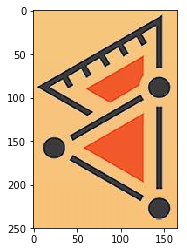

In [399]:
# transpose and print the resulting array
transposed_logo = np.transpose(logo, axes = (1, 0, 2))
print(transposed_logo)

plt.imshow(transposed_logo)
plt.show()

In [ ]:
# Translation #1
# Cho delta x và delta y là số pixel thay đổi theo chiều ngang và chiều dọc, 
# trả lại ảnh bị dịch chuyển có cùng kích cỡ (pixel nào thừa ra thì mang giá trị 0)

translation = np.copy(input_image)

plt.imshow(translation)
plt.show()

x = 451
y = 123
m, n, p = translation.shape

for i in range(m - 1, y, -1):
    translation[i, :] = translation[i - y, :]
for i in range(y + 1):
    translation[i, :] = zeros((n, 3))

for i in range(n - 1, x, -1):
    translation[:, i] = translation[:, i - x]
for i in range(x + 1):
    translation[:, i] = zeros((m, 3))
plt.imshow(translation)
plt.show()


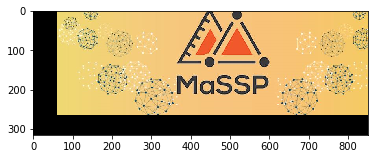

In [10]:
# Translation #2
# Cho delta x và delta y là số pixel thay đổi theo chiều ngang và chiều dọc, 
# trả lại ảnh bị dịch chuyển có cùng kích cỡ (pixel nào thừa ra thì mang giá trị 0)
translated = np.zeros(input_image.shape)
# translate vertically
x = -50
y = 60
if x > 0:
    translated[x:] = input_image[:(input_image.shape[0]-x)]
else:
    translated[:(input_image.shape[0]-abs(x))] = input_image[abs(x):]
    
# translate horizontally
translated_2 = np.zeros(translated.shape)
if y > 0:
    translated_2[:, y:] = translated[:, :(translated.shape[1]-y)]
else:
    translated_2[:, :(translated.shape[1]-abs(y))] = translated[:, abs(y):]
plt.imshow(translated_2)
plt.show()

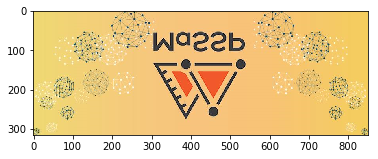

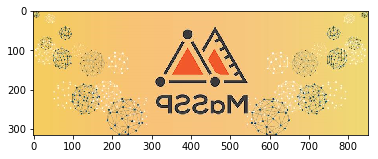

In [401]:
#Flip
#Flip ảnh theo chiều dọc hoặc chiều ngang

flip2 = np.copy(input_image)
flip3 = np.copy(input_image)

flip = np.flipud(flip2)
plt.imshow(flip)
plt.show()

flip = np.fliplr(flip3)
plt.imshow(flip)
plt.show()



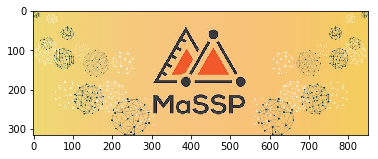

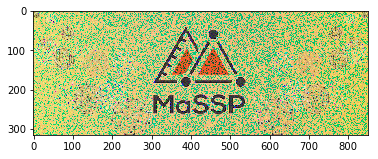

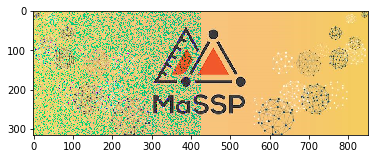

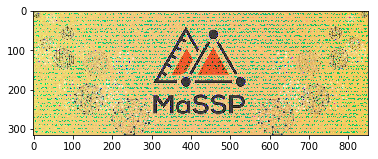

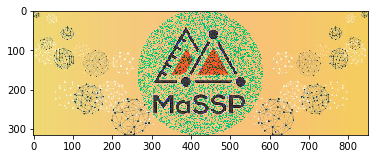

In [391]:
#Color perturbation
#Cách này thêm noise vào hình ảnh để có hiệu ứng như hình này: http://stackoverflow.com/questions/35152636/random-flipping-and-rgb-jittering-slight-value-change-of-image. 
#Ví dụ cho 0.1 thì mỗi phần tử trong ma trận tăng giảm một số ngẫu nhiên từ -0.1 đế +0.1

color = np.copy(input_image)
color2 = np.copy(input_image)
color3 = np.copy(input_image)
color4 = np.copy(input_image)

# origin
plt.imshow(color)
plt.show()

# full of image
for i in range(3):
    noise = (np.random.rand(m, n) - 0.5) * 0.2
    color[:, :, i] += noise
plt.imshow(color)
plt.show()

# a half of image
for i in range(3):
    noise = (np.random.rand(m, n / 2) - 0.5) * 0.2
    color2[:, 1 : (n / 2 + 1), i] += noise
plt.imshow(color2)
plt.show()

# noise in odd columns
for i in range(3):
    noise = (np.random.rand(m, n) - 0.5) * 0.2
    for j in range(0, m, 2):
        color3[j, :, i] += noise[j]
plt.imshow(color3)
plt.show()

# noise in a circle
R = 160
center = [m / 2, n / 2]

for i in range(m):
    for j in range(n):
        if ((i - center[0])**2 + (j - center[1])**2 <= (R)**2):
            noise = (np.random.rand(3) - 0.5) * 0.2
            color4[i, j, :] += noise
            
plt.imshow(color4)
plt.show()

In [ ]:
# Quay 90 độ theo chiều kim đồng hồ:
plt.imshow(np.fliplr(np.transpose(input_image, axes=(1, 0, 2))))
plt.show()